In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Reading and Understanding data

In [2]:
filepath = r'D:\Niku_OneDrive\skill\upgrad\Executive_PGP_Machine_learning&AI\machine_learning_2\advanced_regression_assignment\train.csv'
housing = pd.read_csv(filepath)
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
housing['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [4]:
housing.shape

(1460, 81)

In [5]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
# count of data types in complete dataframe
housing.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [9]:
# Null value columns
(housing.isnull().sum()>0).sum()

19

# Data cleaning

In [10]:
# columns with null value only
na_df = pd.DataFrame(housing.isnull().sum()[housing.isnull().sum()>0])
na_df.index

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [11]:
# % of null value 
((housing.isnull().sum()/housing.shape[0])*100)[housing.isnull().sum()>0]

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

# 1. Handling null value

In [12]:
# creating dataframe for column having null value more than 80%
remove_col = pd.DataFrame(housing.isnull().sum())[housing.isnull().sum()>1100]

In [13]:
# removing columns more than 80%
housing.drop(remove_col.index.tolist(), axis=1, inplace=True)

In [14]:
# no. of columns after removing null value columns more than 80%
(housing.isna().sum()>0).sum()

15

In [15]:
# % NA value after dropping column
((housing.isnull().sum()/housing.shape[0])*100)[housing.isnull().sum()>0].sort_values()

Electrical       0.068493
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
LotFrontage     17.739726
FireplaceQu     47.260274
dtype: float64

# 2. Rows having null values

In [16]:
(housing.isnull().all(axis=0).sum())

0

# 3. Duplicate value

In [17]:
housing.duplicated().sum()

0

# 4. Unique values

In [18]:
(housing.nunique()).sort_values()

Street           2
Utilities        2
CentralAir       2
PavedDrive       3
HalfBath         3
              ... 
1stFlrSF       753
BsmtUnfSF      780
GrLivArea      861
LotArea       1073
Id            1460
Length: 77, dtype: int64

In [19]:
housing.drop(['Id'], axis=1, inplace=True)

Observation:
   - total 19 columns with na values, 15 remaining with less than 40%
   - 0 rows null value
   - 0 duplicates
   - Removing Id column as it has all unique value

In [20]:
# seperate dataframe for numeric data type
df_numeric = housing.select_dtypes(include=['int64', 'float64'])
#df_numeric.drop(['SalePrice'],axis=1, inplace=True)

In [21]:
# seperate dataframe for object data type
df_object = housing.select_dtypes(include=['object'])
df_object.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

# 5. Handling missing value/ null value

In [22]:
# list of null values column with numeric data type only
na_numeric_list = []
for count in range(len(na_df.index)):
    if na_df.index[count] in df_numeric.columns:
        na_numeric_list.append(na_df.index[count])
na_numeric_list

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [23]:
items = 0
visited = []
for items in na_numeric_list:
    print(housing[items].value_counts(dropna=False))

NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
137.0      1
38.0       1
33.0       1
150.0      1
46.0       1
Name: LotFrontage, Length: 111, dtype: int64
0.0      861
NaN        8
72.0       8
108.0      8
180.0      8
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 328, dtype: int64
NaN       81
2005.0    65
2006.0    59
2004.0    53
2003.0    50
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 98, dtype: int64


In [24]:
print(housing[na_numeric_list].describe())

       LotFrontage   MasVnrArea  GarageYrBlt
count  1201.000000  1452.000000  1379.000000
mean     70.049958   103.685262  1978.506164
std      24.284752   181.066207    24.689725
min      21.000000     0.000000  1900.000000
25%      59.000000     0.000000  1961.000000
50%      69.000000     0.000000  1980.000000
75%      80.000000   166.000000  2002.000000
max     313.000000  1600.000000  2010.000000


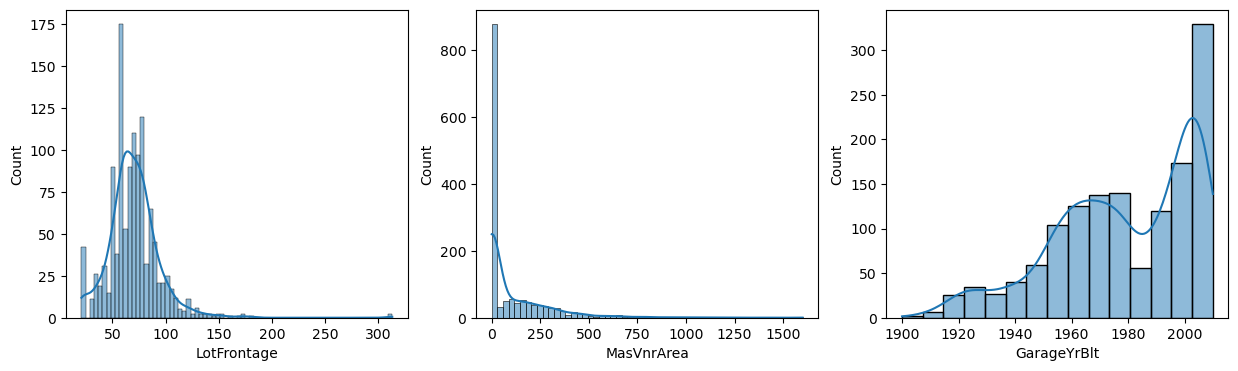

In [25]:
fig = plt.figure(figsize=(15,4))
spec = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)

for i in enumerate(na_numeric_list):
    ax = fig.add_subplot(spec[0,i[0]])
    sns.histplot(housing[i[1]], kde=True)
plt.show()

In [26]:
item = 0
for item in na_numeric_list:
    housing[item] = housing[item].fillna(housing[item].median())

In [27]:
print(housing[na_numeric_list].describe())

       LotFrontage   MasVnrArea  GarageYrBlt
count  1460.000000  1460.000000  1460.000000
mean     69.863699   103.117123  1978.589041
std      22.027677   180.731373    23.997022
min      21.000000     0.000000  1900.000000
25%      60.000000     0.000000  1962.000000
50%      69.000000     0.000000  1980.000000
75%      79.000000   164.250000  2001.000000
max     313.000000  1600.000000  2010.000000


In [28]:
items = 0
visited = []
for items in na_numeric_list:
    print(housing[items].value_counts(dropna=False))

69.0     270
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64
0.0      869
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64
1980.0    96
2005.0    65
2006.0    59
2004.0    53
2003.0    50
          ..
1900.0     1
1906.0     1
1908.0     1
1927.0     1
1933.0     1
Name: GarageYrBlt, Length: 97, dtype: int64


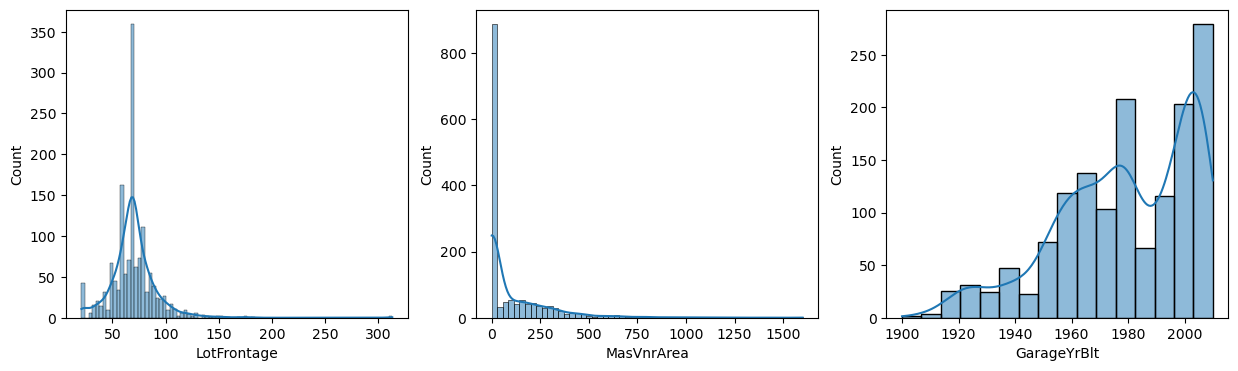

In [29]:
fig = plt.figure(figsize=(15,4))
spec = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)

for i in enumerate(na_numeric_list):
    ax = fig.add_subplot(spec[0,i[0]])
    sns.histplot(housing[i[1]], kde=True)
plt.show()

In [30]:
# list of null values column with object data type only
na_object_list = []
for count in range(len(na_df.index)):
    if na_df.index[count] in df_object.columns:
        na_object_list.append(na_df.index[count])
na_object_list

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [31]:
print(housing[na_object_list].describe())

       MasVnrType BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
count        1452     1423     1423         1422         1423         1422   
unique          4        4        4            4            6            6   
top          None       TA       TA           No          Unf          Unf   
freq          864      649     1311          953          430         1256   

       Electrical FireplaceQu GarageType GarageFinish GarageQual GarageCond  
count        1459         770       1379         1379       1379       1379  
unique          5           5          6            3          5          5  
top         SBrkr          Gd     Attchd          Unf         TA         TA  
freq         1334         380        870          605       1311       1326  


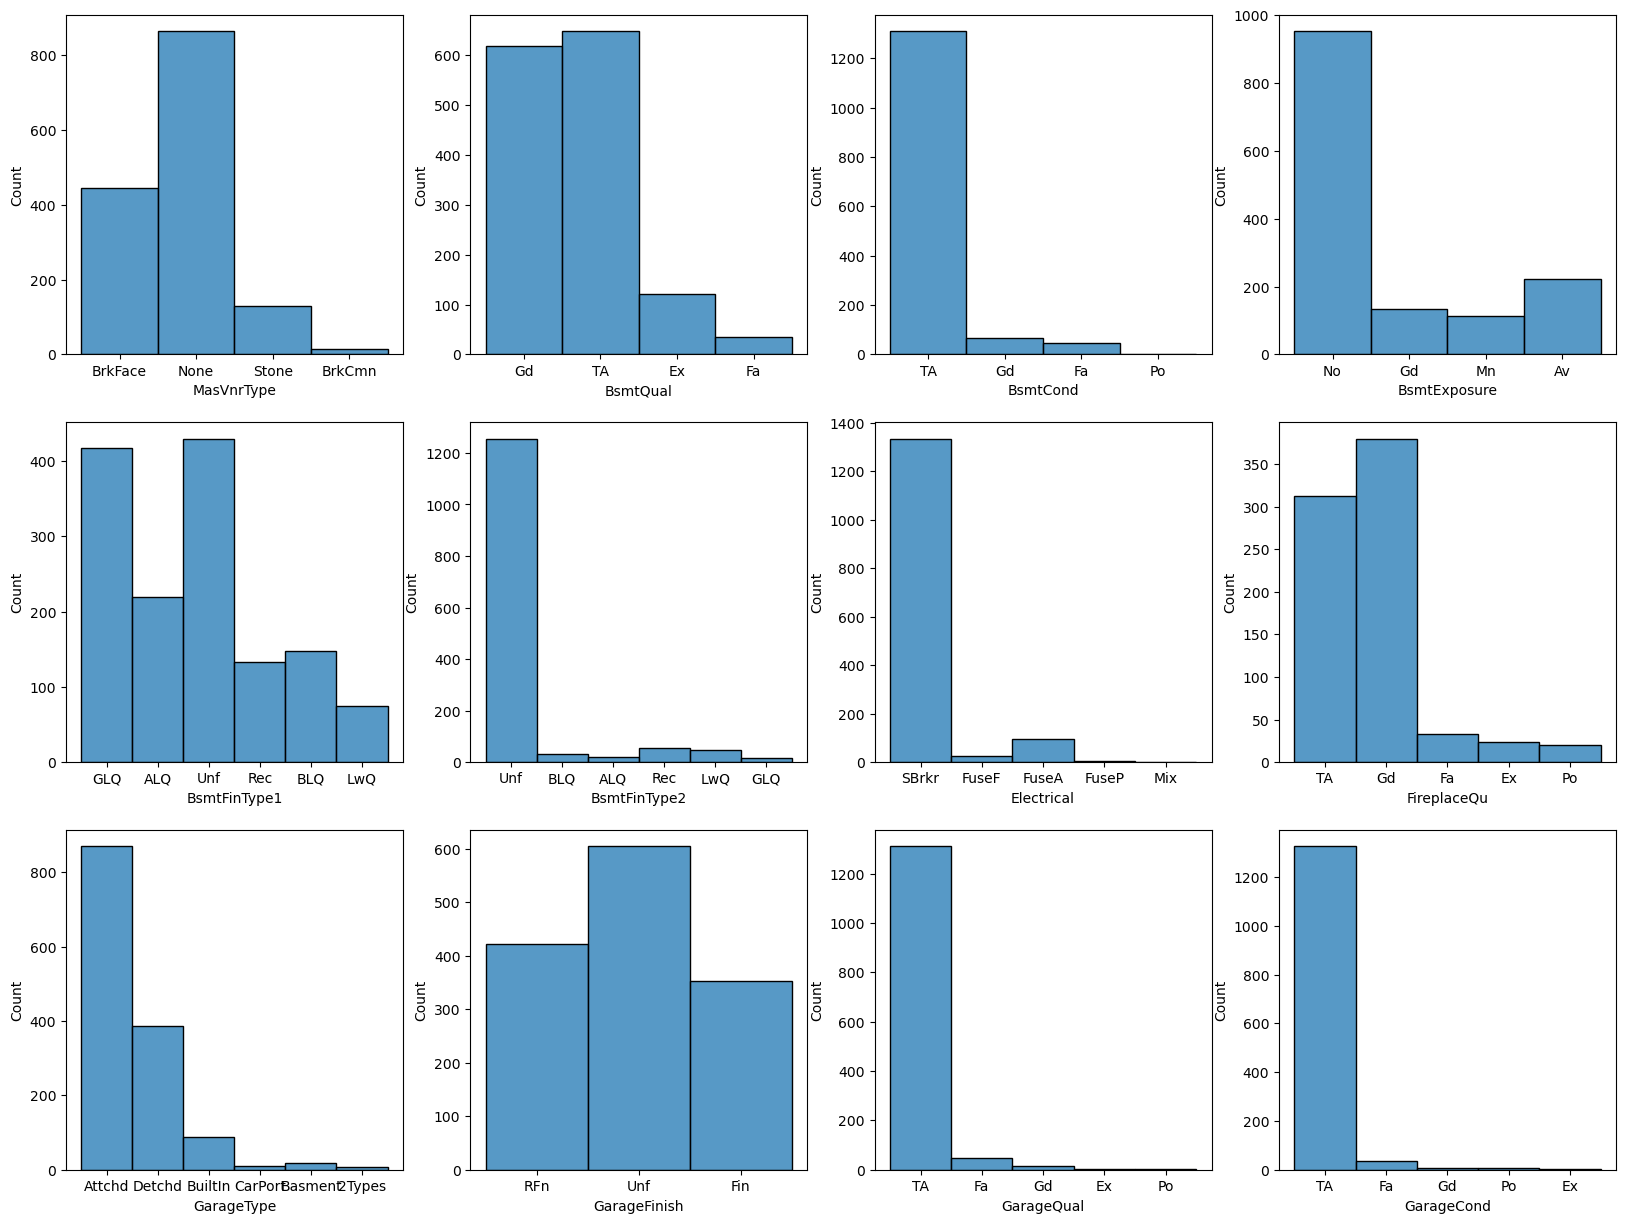

In [32]:
fig = plt.figure(figsize=(20,15))
spec = gridspec.GridSpec(ncols=4, nrows=3, figure=fig)


for datas in enumerate(na_object_list):
    ax = fig.add_subplot(spec[datas[0]])
    sns.histplot(housing[datas[1]])
    
plt.show()

In [33]:
# Replacing None with the respective from dictionary 

housing['GarageType'] = housing['GarageType'].replace(np.nan, 'No Garage')
housing['GarageFinish'] = housing['GarageFinish'].replace(np.nan, 'No Garage')
housing['GarageCond'] = housing['GarageCond'].replace(np.nan, 'No Garage')
housing['GarageQual'] = housing['GarageQual'].replace(np.nan, 'No Garage')
housing['MasVnrType'] = housing['MasVnrType'].replace(np.nan, 'None') # replacing nan with the top option of this field
housing['Electrical'] = housing['Electrical'].replace(np.nan, 'SBrkr')# replacing nan with the top option of this field
housing['FireplaceQu'] = housing['FireplaceQu'].replace(np.nan, 'NO Fireplace')
housing['BsmtExposure'] = housing['BsmtExposure'].replace(np.nan, 'No Basement')
housing['BsmtFinType2'] = housing['BsmtFinType2'].replace(np.nan, 'No Basement')
housing['BsmtFinType1'] = housing['BsmtFinType1'].replace(np.nan, 'No Basement')
housing['BsmtCond'] = housing['BsmtCond'].replace(np.nan, 'No Basement')
housing['BsmtQual'] = housing['BsmtQual'].replace(np.nan, 'No Basement')

In [34]:
print(housing[na_object_list].describe())

       MasVnrType BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
count        1460     1460     1460         1460         1460         1460   
unique          4        5        5            5            7            7   
top          None       TA       TA           No          Unf          Unf   
freq          872      649     1311          953          430         1256   

       Electrical   FireplaceQu GarageType GarageFinish GarageQual GarageCond  
count        1460          1460       1460         1460       1460       1460  
unique          5             6          7            4          6          6  
top         SBrkr  NO Fireplace     Attchd          Unf         TA         TA  
freq         1335           690        870          605       1311       1326  


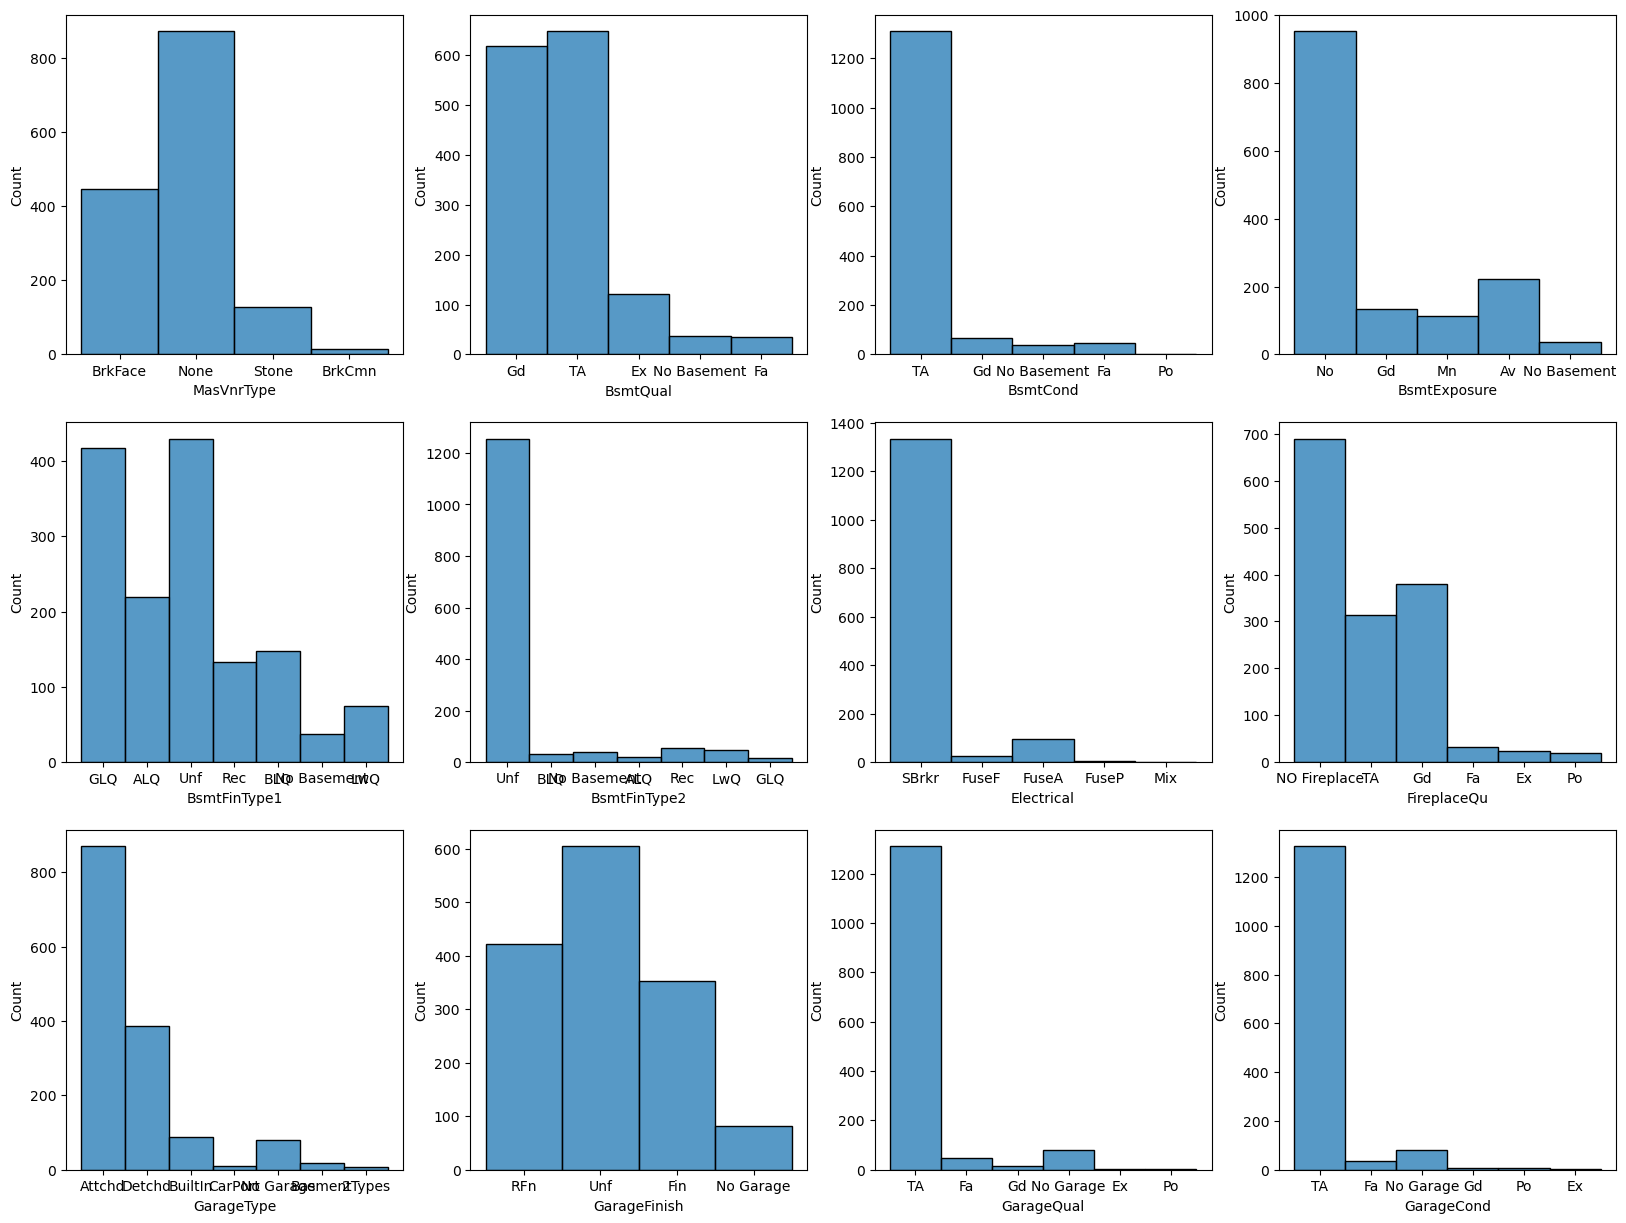

In [35]:
fig = plt.figure(figsize=(20,15))
spec = gridspec.GridSpec(ncols=4, nrows=3, figure=fig)


for datas in enumerate(na_object_list):
    ax = fig.add_subplot(spec[datas[0]])
    sns.histplot(housing[datas[1]])
    
plt.show()

In [36]:
# checking for null value in the dataset
(housing.isnull().sum()>0).sum()

0

No null values in the dataframe

## EDA

# Univariate Analysis on Numerical Data

In [37]:
df_numeric.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

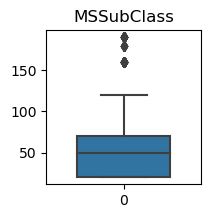

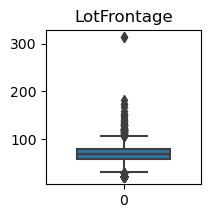

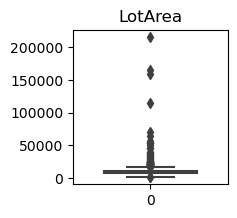

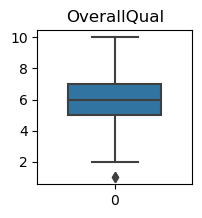

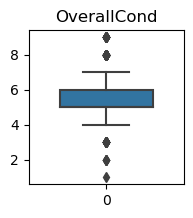

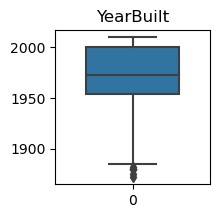

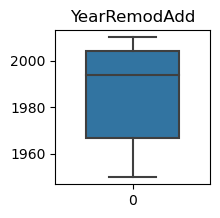

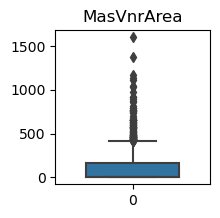

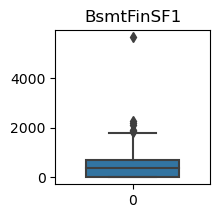

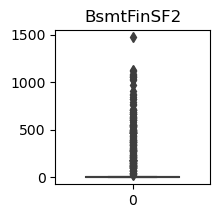

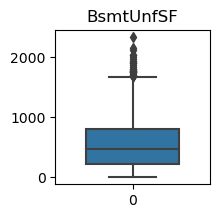

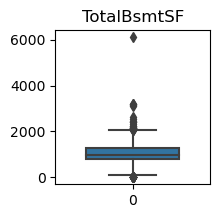

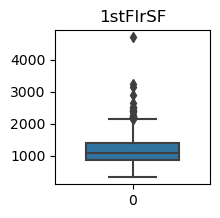

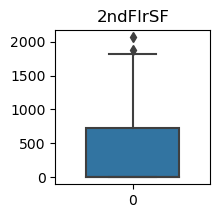

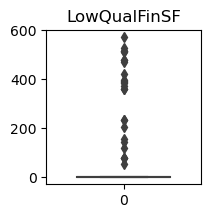

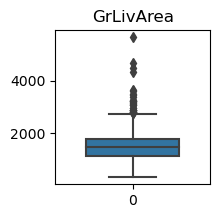

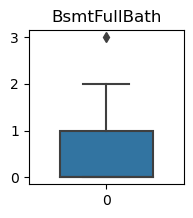

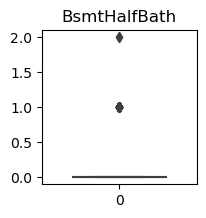

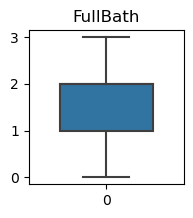

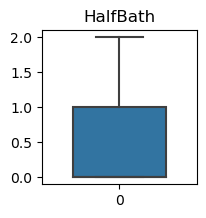

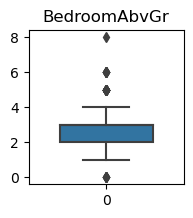

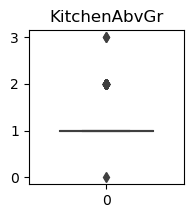

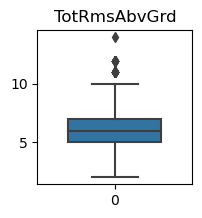

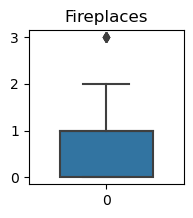

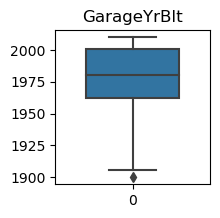

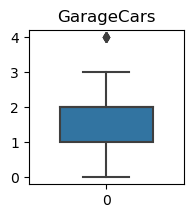

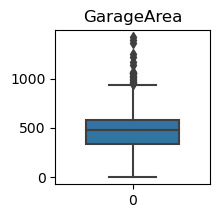

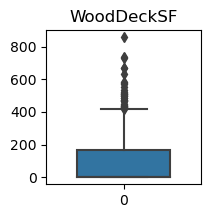

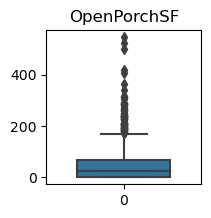

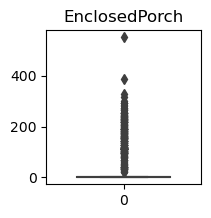

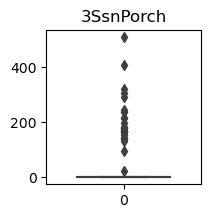

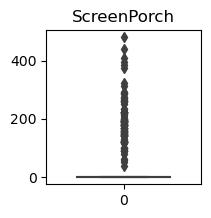

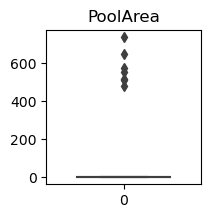

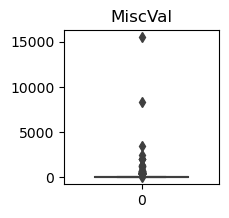

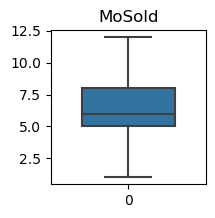

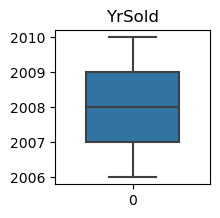

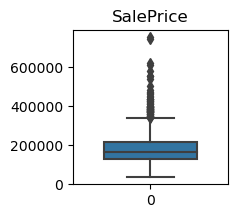

In [38]:
# numerical data univariate analysis   
for cols in df_numeric.columns:
        plt.figure(figsize=(2,2)) 
        sns.boxplot(housing[cols], width=0.6)
        plt.title(cols)
        plt.show()

As we can see there are lot of variables with outliers

## Bivariate Anlysis on numerical data

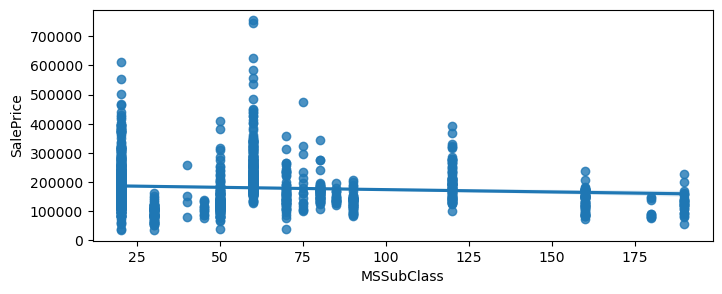

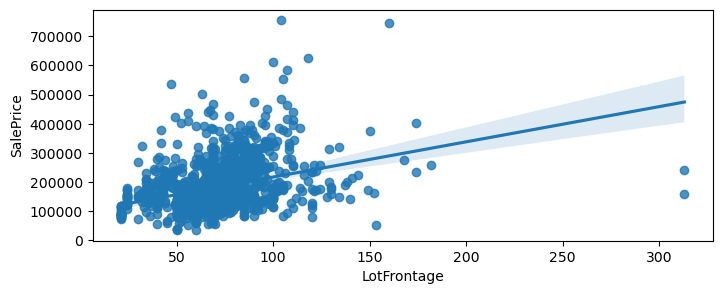

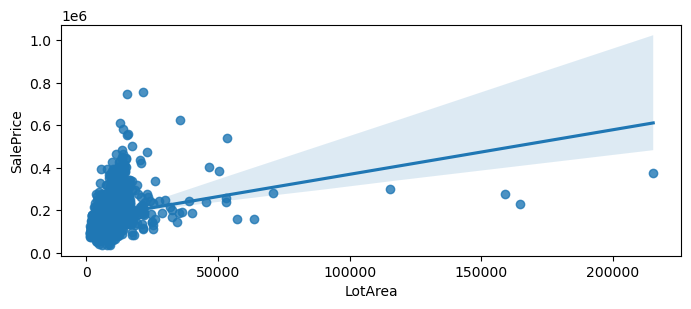

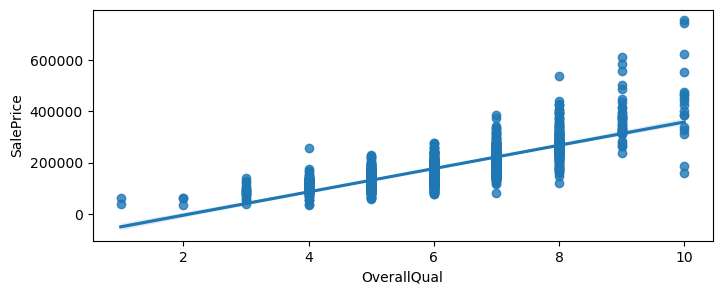

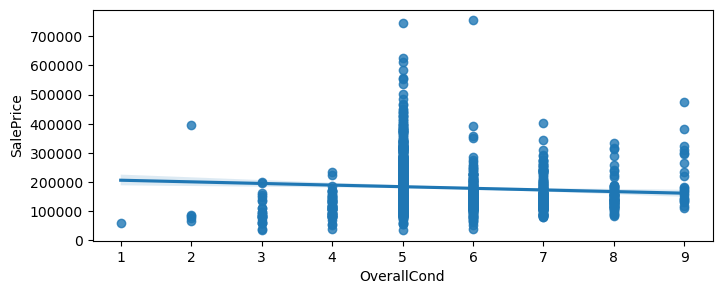

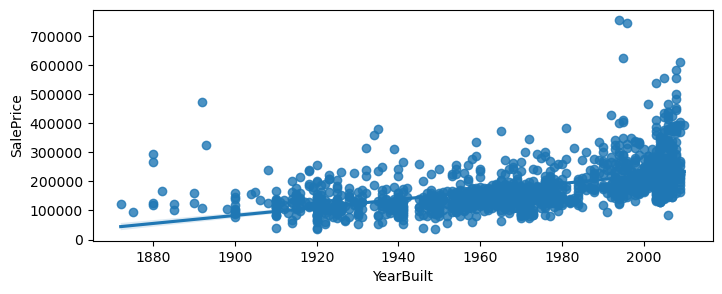

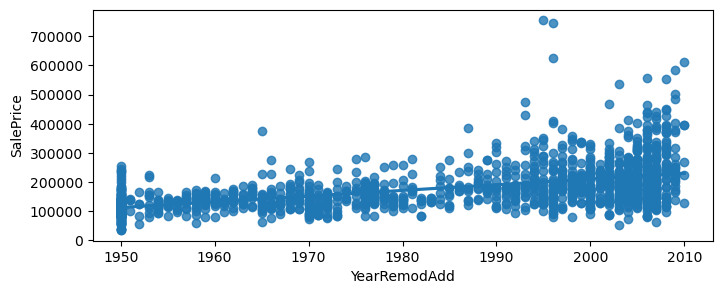

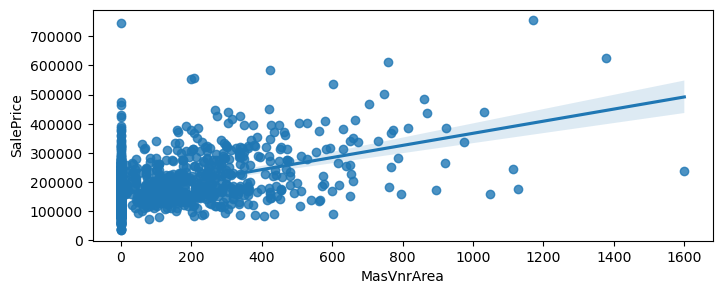

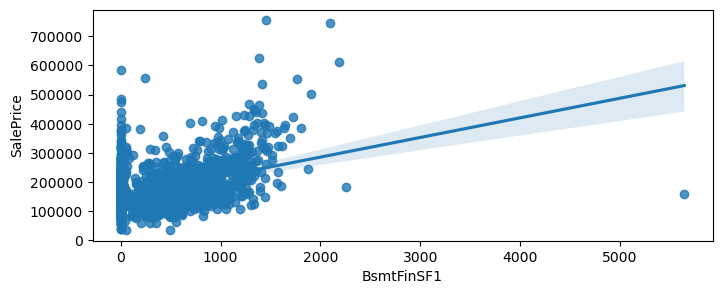

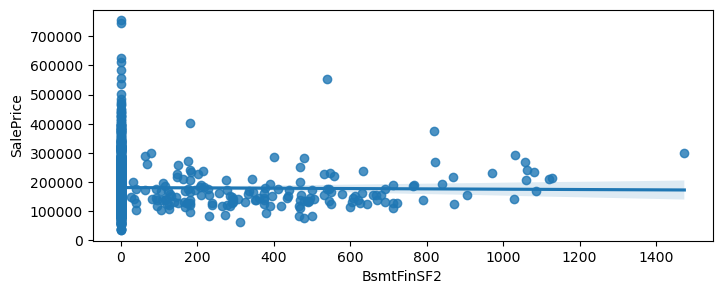

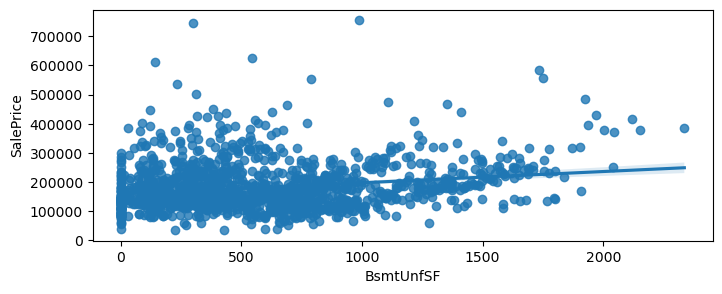

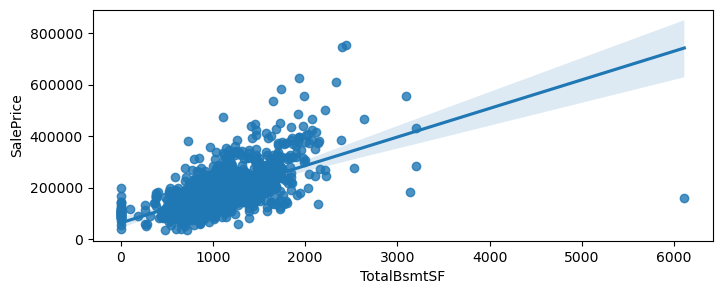

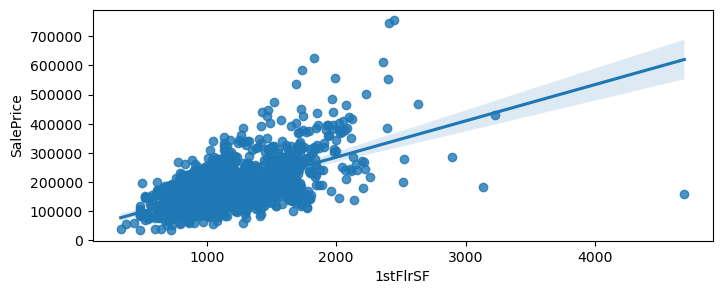

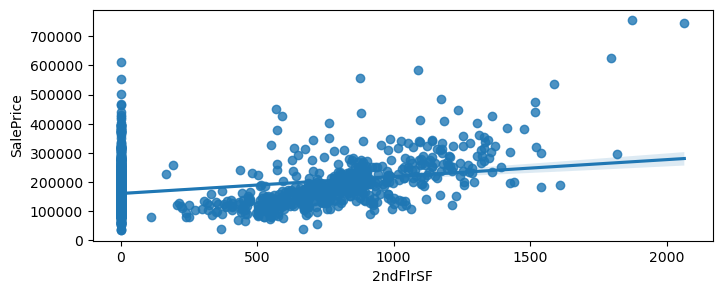

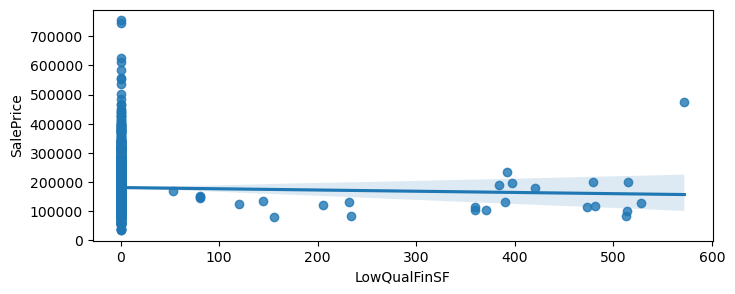

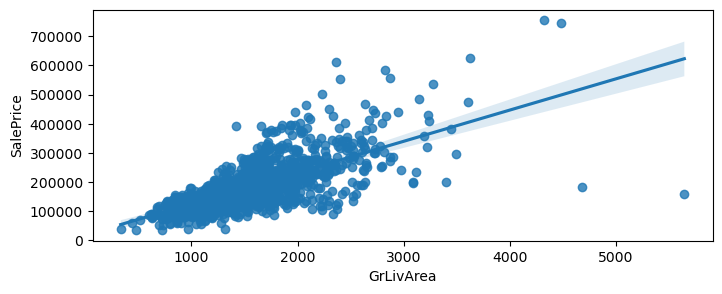

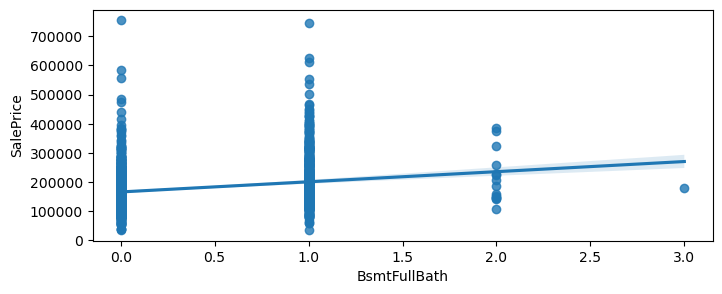

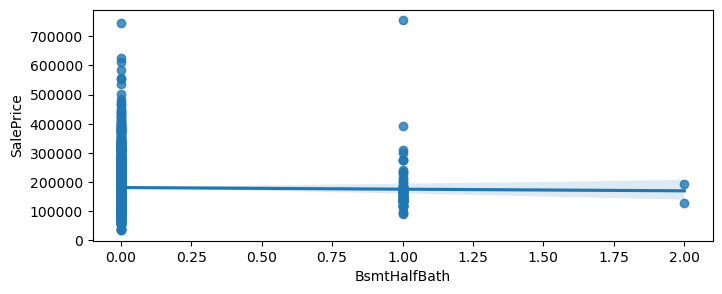

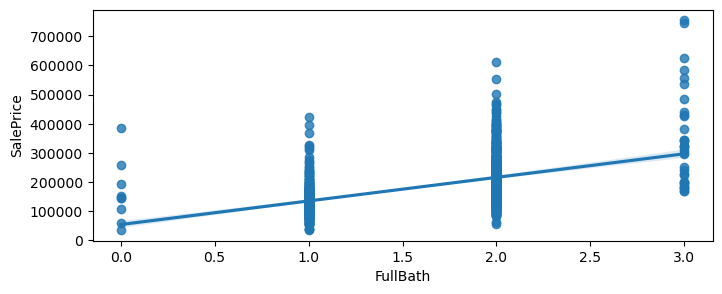

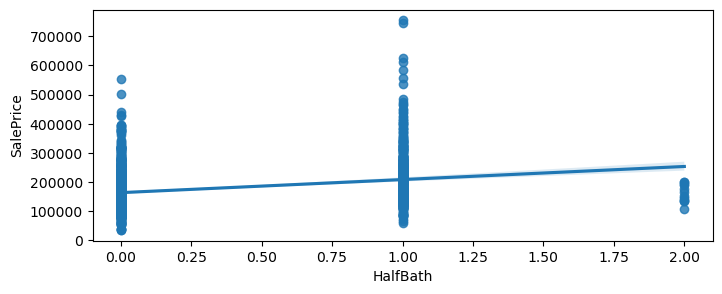

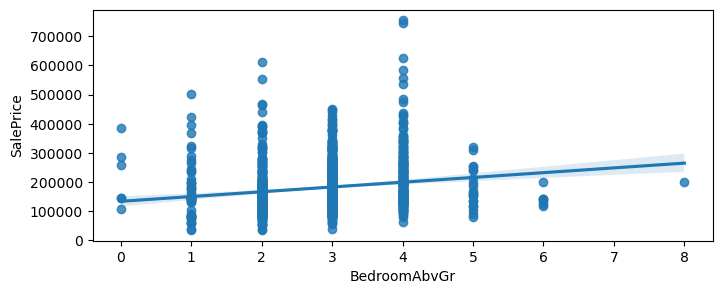

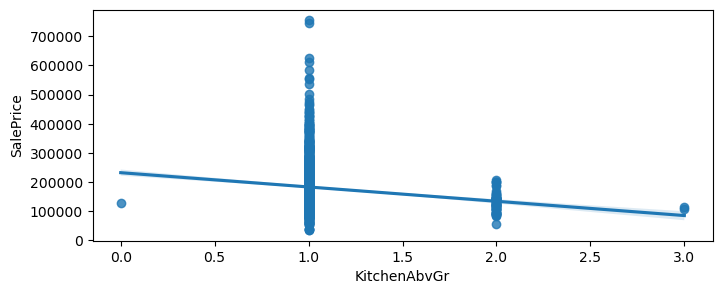

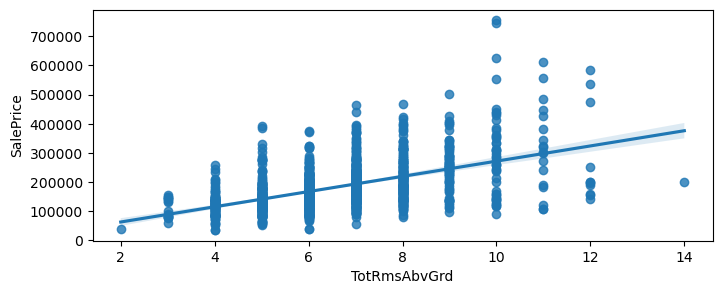

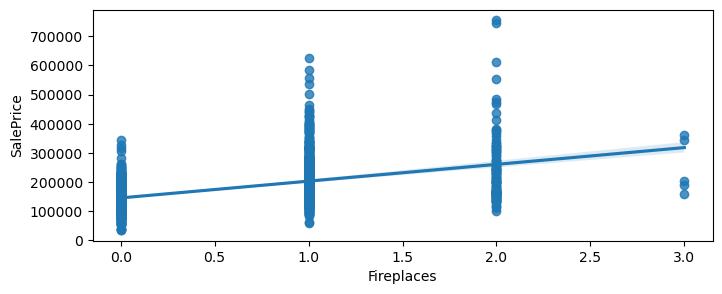

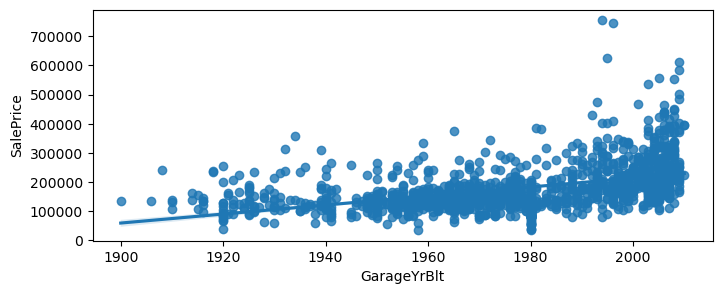

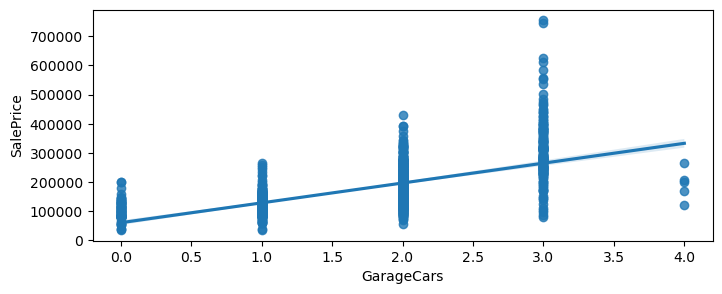

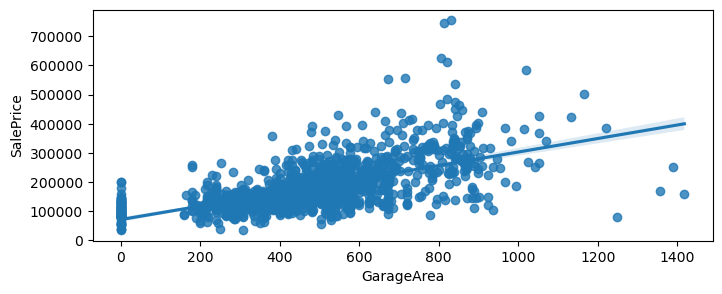

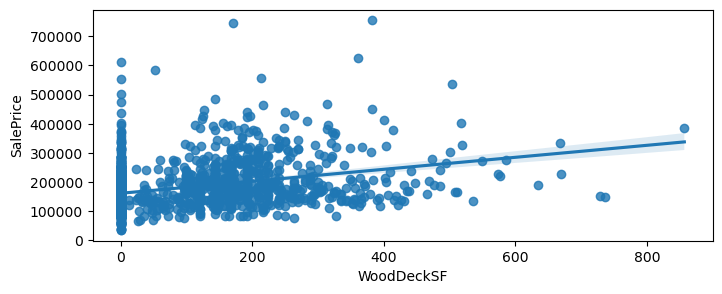

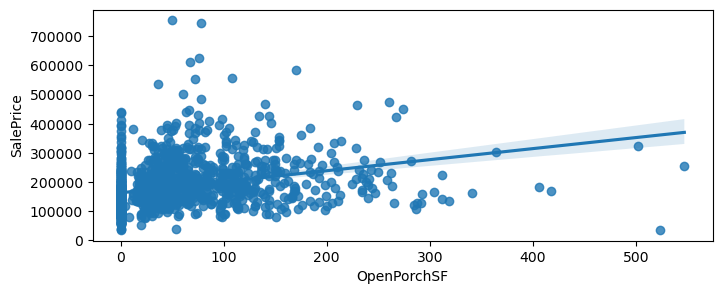

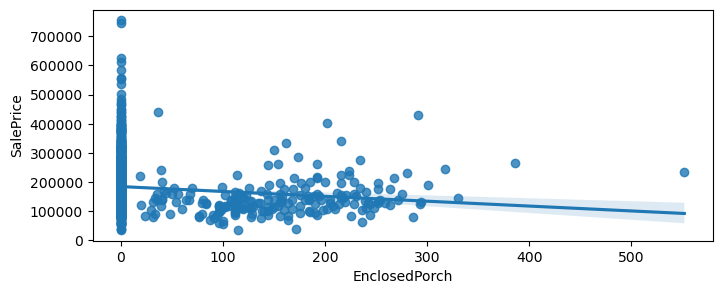

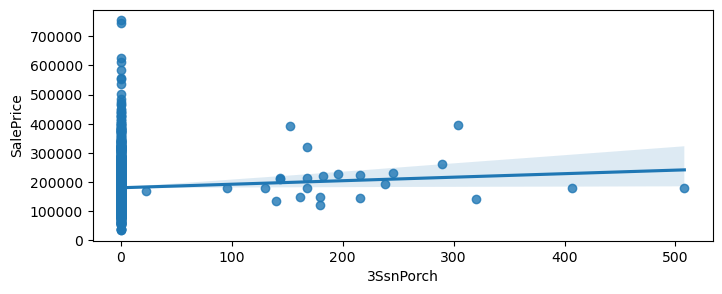

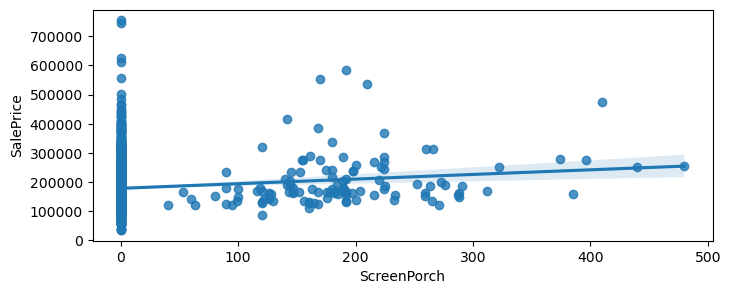

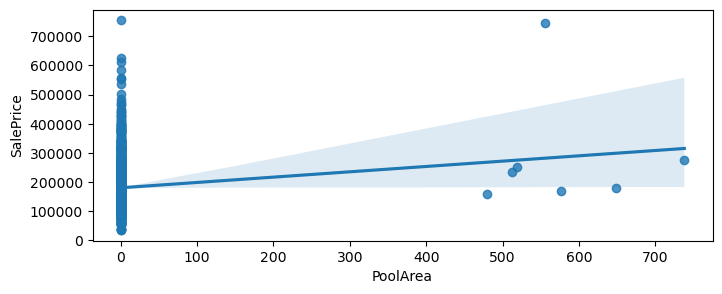

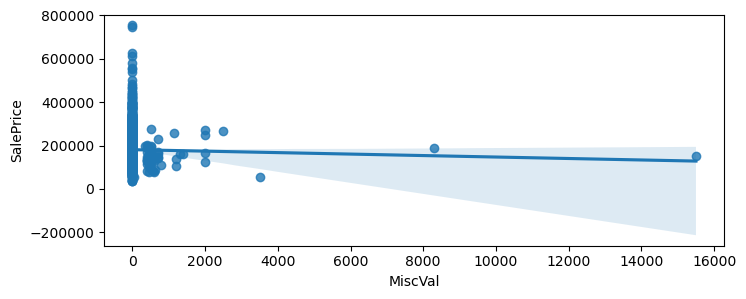

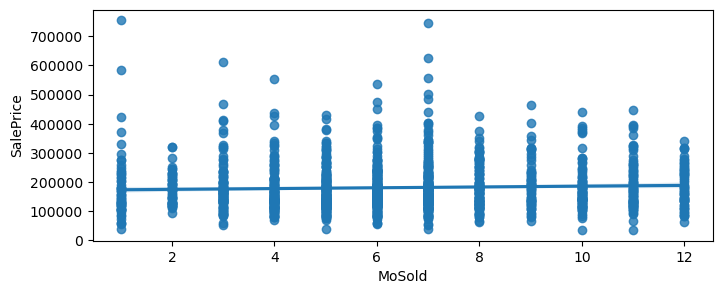

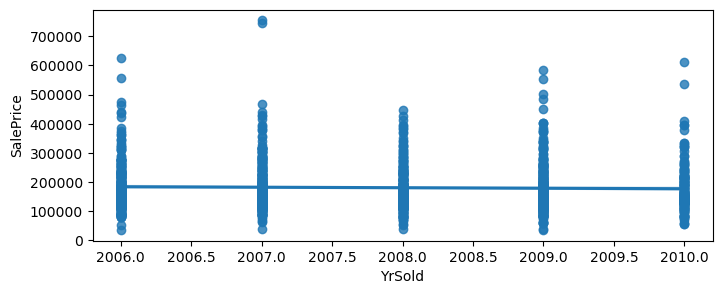

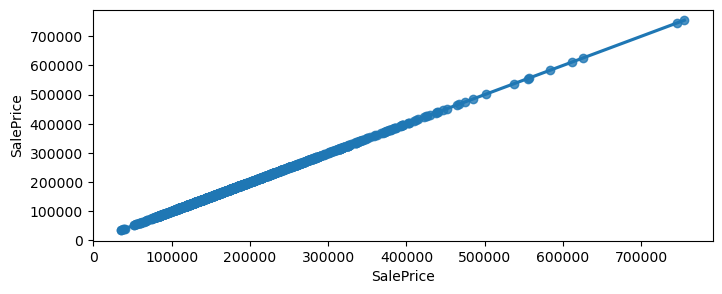

In [39]:
# bivariate analysis
for cols in df_numeric.columns:
    plt.figure(figsize=(8,3))
    sns.regplot(x=cols, y='SalePrice', data=housing)
    plt.show()

In [40]:
# Corelation Matrix
housing[df_numeric.columns].corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,0.042463,...,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.334771
LotArea,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.023573,0.178469,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.042463,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


'SalePrice' highly corelated with 'OverallQual'

In [41]:

def outlier_treatment(df, cols):
# function to treat outliers  
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)

    IQR = Q3 - Q1

    fence_low  = Q1-1.5*IQR

    fence_high = Q3+1.5*IQR

    df.loc[(df[cols] > fence_high), cols] = fence_high
    df.loc[(df[cols] < fence_low), cols] = fence_low
    
    return df

In [42]:
for cols in df_numeric:
   outlier_treatment(housing, cols)

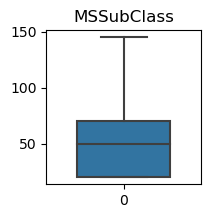

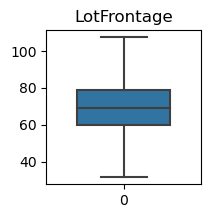

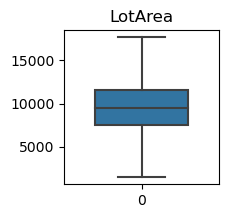

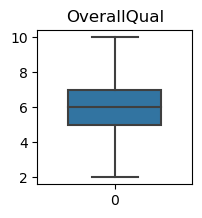

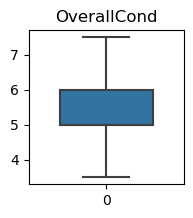

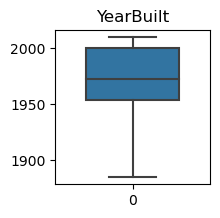

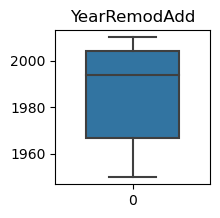

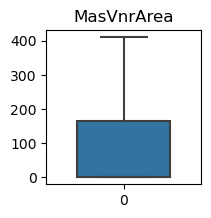

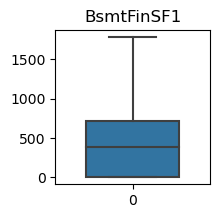

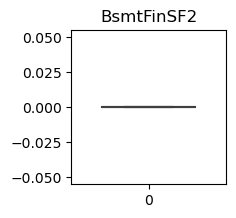

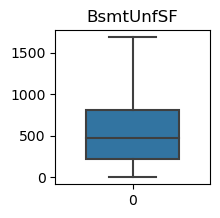

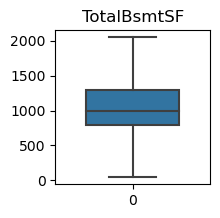

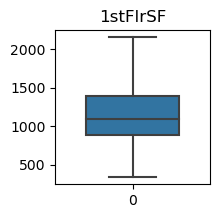

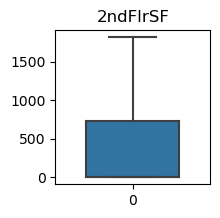

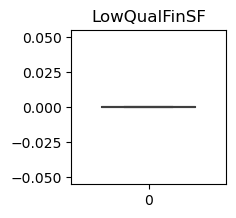

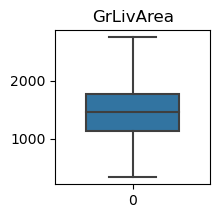

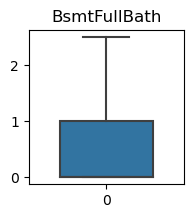

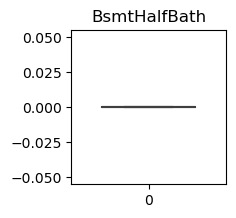

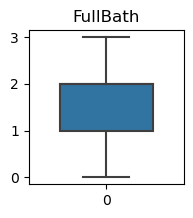

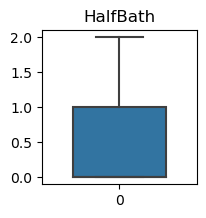

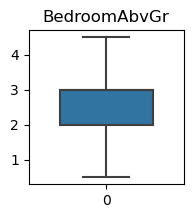

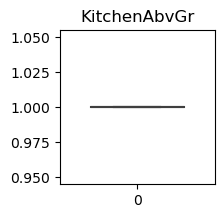

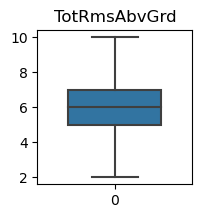

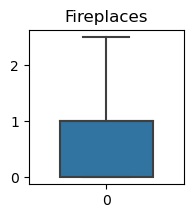

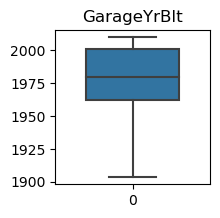

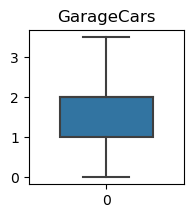

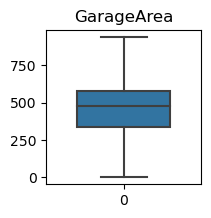

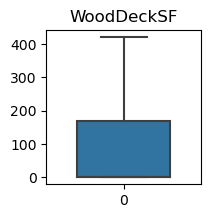

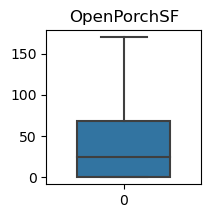

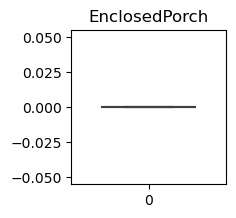

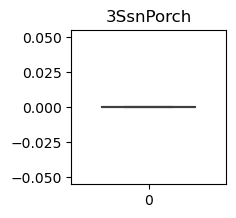

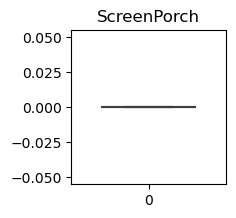

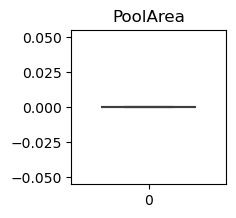

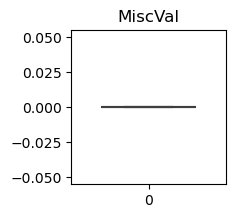

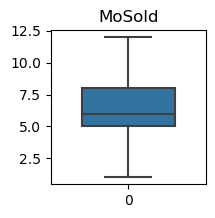

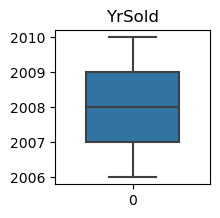

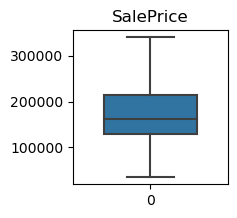

In [43]:
# after treating outlier
for cols in df_numeric.columns:
        plt.figure(figsize=(2,2)) 
        sns.boxplot(housing[cols], width=0.6)
        plt.title(cols)
        plt.show()

## Data Preparation

## Feature Encoding

In [44]:
df_object.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [45]:
housing_dummy = pd.get_dummies(housing[df_object.columns], drop_first=True)

In [46]:
housing_dummy.shape

(1460, 210)

In [47]:
housing_dummy.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [48]:
housing_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 210 entries, MSZoning_FV to SaleCondition_Partial
dtypes: uint8(210)
memory usage: 299.5 KB


In [49]:
# concat dummy variable with main dataframe
housing = pd.concat([housing, housing_dummy], axis=1)

In [50]:
housing.drop(['MSZoning', 'Street','LotShape','LandContour','Utilities', 'LotConfig','LandSlope', 'Neighborhood', 'Condition1',
              'Condition2','BldgType','HouseStyle','RoofStyle', 'RoofMatl','Exterior1st', 'Exterior2nd', 'MasVnrType',
              'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
              'Heating','HeatingQC','CentralAir','Electrical', 'KitchenQual','Functional','FireplaceQu' ,'GarageType', 'GarageFinish',
              'GarageQual', 'GarageCond','PavedDrive','SaleType', 'SaleCondition','MSSubClass',],axis=1,inplace=True) #removing columns as dummy variables already formed

In [51]:
housing.shape

(1460, 246)

In [52]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 246 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(19), int64(17), uint8(210)
memory usage: 710.2 KB


In [53]:
housing.columns.tolist()

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Pave',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_NoSeWa',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood

In [54]:
df_numeric = [cname for cname in housing.columns if housing[cname].dtype in ['int64', 'float64']]
df_object = [cname for cname in housing.columns if housing[cname].dtype in ['object']]

In [55]:
df_numeric

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

## Train-Test Split Data

In [56]:
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

## Scaling

In [57]:
scaler = MinMaxScaler()

df_train[df_numeric] = scaler.fit_transform(df_train[df_numeric])
df_test[df_numeric] = scaler.transform(df_test[df_numeric])

In [58]:
df_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.0,1021.000000,...,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,0.490128,0.501962,0.511508,0.513345,0.690194,0.582305,0.217363,0.248840,0.0,0.332433,...,0.002938,0.003918,0.078355,0.002938,0.870715,0.002938,0.007835,0.013712,0.825661,0.078355
std,0.229074,0.221526,0.174568,0.239528,0.242225,0.343843,0.328068,0.243935,0.0,0.259931,...,0.054153,0.062500,0.268860,0.054153,0.335680,0.054153,0.088214,0.116350,0.379587,0.268860
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.375000,0.368361,0.375000,0.375000,0.552000,0.283333,0.000000,0.000000,0.0,0.128152,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.493421,0.495214,0.500000,0.375000,0.704000,0.733333,0.000000,0.220147,0.0,0.274103,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.611842,0.619473,0.625000,0.625000,0.920000,0.900000,0.384779,0.399860,0.0,0.478196,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
df_test.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.0,438.000000,...,438.000000,438.000000,438.000000,438.0,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000
mean,0.504371,0.509766,0.514840,0.505422,0.690411,0.577816,0.219091,0.242512,0.0,0.339693,...,0.004566,0.002283,0.095890,0.0,0.860731,0.002283,0.009132,0.013699,0.808219,0.102740
std,0.220921,0.223455,0.167195,0.244518,0.238039,0.345295,0.322972,0.242035,0.0,0.247414,...,0.067496,0.047782,0.294778,0.0,0.346623,0.047782,0.095235,0.116370,0.394152,0.303966
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.375000,0.387259,0.375000,0.375000,0.552000,0.266667,0.000000,0.000000,0.0,0.150994,...,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.493421,0.488266,0.500000,0.375000,0.696000,0.716667,0.000000,0.202457,0.0,0.296945,...,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.638158,0.631083,0.625000,0.625000,0.928000,0.900000,0.423744,0.398596,0.0,0.480273,...,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,0.992000,1.000000,1.000000,1.000000,0.0,1.000000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## X and y for train and test data

In [60]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [61]:
y_test = df_test.pop('SalePrice')
X_test = df_test

## Model Building and Evaluation

## Linear Regression

In [62]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [63]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-1.185725673755603
[-3.49662428e-03  8.96195227e-02  1.80328054e-01  7.41787640e-02
  1.27850503e-01  3.95501166e-02  2.13855461e-02 -1.53818045e-02
 -4.02279078e+10 -6.99630976e-02  2.17771530e-01 -3.46422195e-02
  4.24475670e-02 -1.12185940e+11  3.82930756e-01  3.57462168e-02
 -7.77213481e+09 -1.02758408e-02 -1.71303749e-02 -2.12154388e-02
 -5.12213008e+10 -1.41968727e-02  9.94014740e-03 -1.13840103e-02
  1.84994936e-03  1.10967994e-01  1.67675018e-02  1.51131153e-02
 -4.09048786e+10 -3.93274850e+10 -1.18369609e+10 -7.25948319e+09
  3.08704638e+10  8.95400345e-03 -5.32889366e-03  1.19150162e-01
  1.18202686e-01  1.10290051e-01  9.50624943e-02  1.92475826e-02
 -1.36289597e-02  3.23021412e-02  7.63893127e-04  6.80267811e-03
  7.33561814e-03  1.78995132e-02 -6.28554225e-02  1.15626454e-02
 -2.13165283e-02 -2.90801525e-02  3.36647034e-04  2.57794857e-02
  2.83154249e-02  2.59595513e-02  1.45931244e-02  2.79386044e-02
  2.17614174e-02 -1.88349485e-02  6.70442581e-02 -3.29704285e-02
 -4.69

In [64]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R square value for Linear Regression Model Train set',r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R square value for Linear Regression Model Test set',r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS value for Linear Regression Model Train set',rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS value for Linear Regression Model Test set',rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE value for Linear Regression Model Train set',mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE value for Linear Regression Model Test set',mse_test_lr)
metric.append(mse_test_lr**0.5)

R square value for Linear Regression Model Train set 0.9556120327139555
R square value for Linear Regression Model Test set -2.0397396142900252e+20
RSS value for Linear Regression Model Train set 2.2087008378164033
RSS value for Linear Regression Model Test set 4.2677649042064157e+21
MSE value for Linear Regression Model Train set 0.0021632721232286026
MSE value for Linear Regression Model Test set 9.743755489055744e+18


## Ridge  Regression

In [65]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0, 500.0, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05,
                                   0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0, 500.0,
                                   1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [66]:
model_cv.best_params_

{'alpha': 5.0}

This is the best value of the hyper-parameter as considered by the model.

In [67]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 6.96074503e-03  6.76705186e-02  1.33590696e-01  6.34356608e-02
  3.67432809e-02  4.05866563e-02  2.30274261e-02  4.06138169e-02
  0.00000000e+00 -6.34790822e-03  9.94984416e-02  8.19535021e-02
  7.06215594e-02  0.00000000e+00  1.73056843e-01  3.60628096e-02
  0.00000000e+00  1.77689666e-02  1.05121147e-02 -2.22057397e-04
  0.00000000e+00  2.38892366e-02  6.19315500e-03  2.03515709e-04
  4.15536795e-02  6.86862975e-02  1.71485136e-02  1.53247474e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.17563088e-02 -1.21656532e-03  2.65015716e-02
  2.38188789e-02  2.73864614e-02  1.07961799e-02  3.93983951e-03
 -4.34888900e-03 -2.41213557e-02  3.79198517e-04  3.30204240e-02
  2.83338746e-02  2.95546565e-02 -1.64873016e-02  1.83565271e-02
 -2.02477925e-02 -1.08165486e-02  2.05334071e-04  2.35562830e-02
  2.32117349e-02 -3.13888182e-04  4.75333916e-03  4.88107394e-03
  2.48860174e-02 -1.93661141e-02  5.50375561e-02 -5.44209416e-02
 -1.39091774e-02 -1.85128

In [68]:
# Ridge model parameters
model_parameters = list(sorted(ridge.coef_))
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', -0.131),
 ('LotFrontage', -0.089),
 ('LotArea', -0.054),
 ('OverallQual', -0.05),
 ('OverallCond', -0.046),
 ('YearBuilt', -0.045),
 ('YearRemodAdd', -0.044),
 ('MasVnrArea', -0.043),
 ('BsmtFinSF1', -0.041),
 ('BsmtFinSF2', -0.041),
 ('BsmtUnfSF', -0.037),
 ('TotalBsmtSF', -0.036),
 ('1stFlrSF', -0.035),
 ('2ndFlrSF', -0.034),
 ('LowQualFinSF', -0.033),
 ('GrLivArea', -0.031),
 ('BsmtFullBath', -0.031),
 ('BsmtHalfBath', -0.028),
 ('FullBath', -0.027),
 ('HalfBath', -0.025),
 ('BedroomAbvGr', -0.024),
 ('KitchenAbvGr', -0.023),
 ('TotRmsAbvGrd', -0.022),
 ('Fireplaces', -0.022),
 ('GarageYrBlt', -0.021),
 ('GarageCars', -0.021),
 ('GarageArea', -0.02),
 ('WoodDeckSF', -0.02),
 ('OpenPorchSF', -0.019),
 ('EnclosedPorch', -0.019),
 ('3SsnPorch', -0.019),
 ('ScreenPorch', -0.019),
 ('PoolArea', -0.017),
 ('MiscVal', -0.016),
 ('MoSold', -0.016),
 ('YrSold', -0.015),
 ('MSZoning_FV', -0.015),
 ('MSZoning_RH', -0.015),
 ('MSZoning_RL', -0.014),
 ('MSZoning_RM', -0.014),
 ('St

In [69]:
# R square, RSS, MSE vale for Ridge Regression
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric1 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R square value for Ridge Regression Model Train set',r2_train_lr)
metric1.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R square value for Ridge Regression Model Test set',r2_test_lr)
metric1.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS value for Ridge Regression Model Train set',rss1_lr)
metric1.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS value for Ridge Regression Model Test set',rss2_lr)
metric1.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE value for Ridge Regression Model Train set',mse_train_lr)
metric1.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE value for Ridge Regression Model Test set',mse_test_lr)
metric1.append(mse_test_lr**0.5)

R square value for Ridge Regression Model Train set 0.9343046067403612
R square value for Ridge Regression Model Test set 0.898149074234758
RSS value for Ridge Regression Model Train set 3.268937034178225
RSS value for Ridge Regression Model Test set 2.1310357625874263
MSE value for Ridge Regression Model Train set 0.003201701306736753
MSE value for Ridge Regression Model Test set 0.00486537845339595


## Lasso Regression

In [70]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05,
                                   0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0, 500.0,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [71]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [72]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [73]:
# lasso model parameters
lasso_model_parameters = list(lasso.coef_)
lasso_model_parameters.insert(0, lasso.intercept_)
lasso_model_parameters = [round(x, 3) for x in lasso_model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, lasso_model_parameters))

[('constant', -0.229),
 ('LotFrontage', 0.0),
 ('LotArea', 0.072),
 ('OverallQual', 0.186),
 ('OverallCond', 0.075),
 ('YearBuilt', 0.077),
 ('YearRemodAdd', 0.038),
 ('MasVnrArea', 0.022),
 ('BsmtFinSF1', 0.002),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', -0.05),
 ('TotalBsmtSF', 0.169),
 ('1stFlrSF', -0.0),
 ('2ndFlrSF', 0.019),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.344),
 ('BsmtFullBath', 0.035),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.0),
 ('HalfBath', -0.0),
 ('BedroomAbvGr', -0.011),
 ('KitchenAbvGr', 0.0),
 ('TotRmsAbvGrd', -0.002),
 ('Fireplaces', -0.0),
 ('GarageYrBlt', -0.0),
 ('GarageCars', 0.038),
 ('GarageArea', 0.065),
 ('WoodDeckSF', 0.014),
 ('OpenPorchSF', 0.009),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('MoSold', 0.01),
 ('YrSold', -0.002),
 ('MSZoning_FV', 0.022),
 ('MSZoning_RH', 0.029),
 ('MSZoning_RL', 0.031),
 ('MSZoning_RM', 0.014),
 ('Street_Pave', 0.0),
 ('LotShape_IR2', -0.006),
 ('LotShape_IR3

In [74]:
# R square, RSS, MSE vale for lasso Regression
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R square value for Lasso Regression Model Train set',r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R square value for Lasso Regression Model Test set',r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS value for Lasso Regression Model Train set',rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS value for Lasso Regression Model Test set',rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE value for Lasso Regression Model Train set',mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE value for Lasso Regression Model Test set',mse_test_lr)
metric2.append(mse_test_lr**0.5)

R square value for Lasso Regression Model Train set 0.9424677133060195
R square value for Lasso Regression Model Test set 0.8905901402074616
RSS value for Lasso Regression Model Train set 2.8627490194271497
RSS value for Lasso Regression Model Test set 2.2891919955149107
MSE value for Lasso Regression Model Train set 0.0028038677957170906
MSE value for Lasso Regression Model Test set 0.005226465743184728


## Evaluation Metrics

In [75]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric1, name = 'Ridge Regression')
ls_metric = pd.Series(metric2, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.556120e-01,0.934305,0.942468
1,R2 Score (Test),-2.039740e+20,0.898149,0.890590
2,RSS (Train),2.208701e+00,3.268937,2.862749
3,RSS (Test),4.267765e+21,2.131036,2.289192
4,MSE (Train),4.651099e-02,0.056584,0.052952
5,MSE (Test),3.121499e+09,0.069752,0.072294


## Changes in coefficients after regularization

In [76]:
betas = pd.DataFrame(index=X_train.columns)

In [77]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [78]:
pd.set_option('display.max_rows', None)
betas.head(10)

,Linear,Ridge,Lasso
LotFrontage,-3.496624e-03,0.006961,0.000000
LotArea,8.961952e-02,0.067671,0.072097
OverallQual,1.803281e-01,0.133591,0.185885
OverallCond,7.417876e-02,0.063436,0.074665
YearBuilt,1.278505e-01,0.036743,0.076961
YearRemodAdd,3.955012e-02,0.040587,0.037832
MasVnrArea,2.138555e-02,0.023027,0.022236
BsmtFinSF1,-1.538180e-02,0.040614,0.002483
BsmtFinSF2,-4.022791e+10,0.000000,0.000000
BsmtUnfSF,-6.996310e-02,-0.006348,-0.050431


## Top 5 most significant variables in Ridge and Lasso

In [79]:
(betas['Ridge'].sort_values(ascending=False)).head()

GrLivArea      0.173057
OverallQual    0.133591
TotalBsmtSF    0.099498
1stFlrSF       0.081954
2ndFlrSF       0.070622
Name: Ridge, dtype: float64

In [80]:
(betas['Lasso'].sort_values(ascending=False)).head()

GrLivArea          0.344184
OverallQual        0.185885
TotalBsmtSF        0.169214
Condition2_PosA    0.133804
YearBuilt          0.076961
Name: Lasso, dtype: float64

## Final Predictor Variable

The variable which have higher value of coefficients for Ridge and Lasso match and hence below are our final most important predictor variables
   - GrLivArea  : Above grade (ground) living area square feet
   - OverallQual: Rates the overall material and finish of the house
   - TotalBsmtSF: Total square feet of the bsement area